# Target Selection

### Goals:
- Confirm if the ATA is able to observe Luyten's Star (GJ 273)

### Steps:
1. Define observer (ATA)
2. Define constraints
3. Check if GJ 273 can be seen w/ ATA given constraints

### Defining the Observer (ATA)

Ref: https://astroplan.readthedocs.io/en/latest/getting_started.html

In [1]:
import astropy.units as u
from astropy.coordinates import EarthLocation
from pytz import timezone
from astroplan import Observer

In [2]:
# ---- Define ATA location parameters ----

longitude = (-(121+28.0/60+24.0/3600))*u.deg
latitude = (40+49.0/60+3.0/3600)*u.deg
elevation = 1008*u.m

location = EarthLocation(longitude, latitude, elevation) # confirm if coords are geocentric or geodesic!

In [3]:
# ---- Define observer ----

ATA = Observer(name = 'Allen Telescope Array',
              location = location, 
              timezone = timezone('US/Pacific'),
              description = "Allen Telescope Array @ Hat Creek Radio Observatory, CA")

### Defining Constraints

Ref: https://astroplan.readthedocs.io/en/latest/tutorials/constraints.html

In [4]:
from astroplan import FixedTarget
from astropy.time import Time

In [5]:
time_range = Time(["2021-07-20 00:00", "2021-08-14 00:00"])

t_start = Time(["2021-07-20 00:00"])

In [6]:
# ---- Read in table of targets ----

from astropy.table import Table

target_table = Table.read('ata-targets.txt', format='ascii') # ata-catalogue.txt taken from https://github.com/SETIatHCRO/gr-ata/blob/master/docs/ata-catalog.txt

In [7]:
# ---- Create FixedTarget objects for each target in the table ---

from astropy.coordinates import SkyCoord

targets = [FixedTarget(coord=SkyCoord(ra=ra*u.deg, dec=dec*u.deg), 
                       name=name) for name, ra, dec in target_table]

In [8]:
# ---- Set up constraints ----

from astroplan import (AltitudeConstraint, AtNightConstraint, MoonSeparationConstraint, MoonIlluminationConstraint, SunSeparationConstraint) # Q: Do I need to consider airmass constraint?

constraints = [AltitudeConstraint(20*u.deg, 89*u.deg), 
               SunSeparationConstraint(min=1*u.deg), 
               MoonSeparationConstraint(min=1*u.deg)] # How to determine minimum moon separation?

In [ ]:
# ---- Visualising constraints ----



In [9]:
from astroplan import is_observable, is_always_observable, months_observable

In [10]:
# ---- Are the targets ever observable in the time range? ----

ever_observable = is_observable(constraints, ATA, targets, time_range=time_range)

In [11]:
# ---- Are the targets always observable in the time range? ----

always_observable = is_always_observable(constraints, ATA, targets, time_range=time_range)

In [12]:
months_observable(constraints, ATA, targets)

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]

In [13]:
import numpy as np

In [14]:
observability = Table()
observability['targets'] = [target.name for target in targets]
observability['ever_observable'] = ever_observable
observability['always_observable'] = always_observable

print(observability)

targets ever_observable always_observable
------- --------------- -----------------
 luyten            True             False


In [88]:
# ---- Are the targets never observable in the time range? ----

# not_observable = Table()

for ever_observable in observability:
    if ever_observable == False:
#         not_observable['targets'] = [target.name]
        print(target.name)

In [70]:
ever_observable.

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
from astroplan import observability_table

table = observability_table(constraints, ATA, targets, time_range=time_range)

print(table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     luyten            True             False         0.37666666666666665


In [16]:
t_start = Time("2021-07-20 00:00")
t_end = Time("2021-08-14 00:00")
t_range = t_start + (t_end - t_start)*np.linspace(0, 1, 1475)

In [18]:
ATA.target_is_up(t_range, luyten)

array([ True,  True,  True, ...,  True,  True,  True])

In [139]:
luyten_rise = ATA.target_rise_time(observe_time, luyten) + 5*u.minute
luyten_set = ATA.target_set_time(observe_time, luyten) - 5*u.minute

In [143]:
sunset = ATA.sun_set_time(observe_time, which='nearest')
sunset.iso

'2021-07-20 03:28:10.562'

In [144]:
sunrise = ATA.sun_rise_time(observe_time, which='nearest')
sunrise.iso

'2021-07-19 12:55:52.565'

### Plotting Sky Chart of Targets

In [23]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_sky
from astropy.coordinates import get_moon, get_sun

In [70]:
# Targets
luyten = FixedTarget.from_name("Luyten's Star")
p_cent = FixedTarget.from_name("Proxima Centauri")
ross128 = FixedTarget.from_name("Ross 128")
tau_cet = FixedTarget.from_name("Tau Cet")
teegarden = FixedTarget.from_name("Teegarden's Star")
gj1061 = FixedTarget.from_name("GJ 1061")
wolf1061 = FixedTarget.from_name("Wolf 1061")
gj682 = FixedTarget.from_name("GJ 682")
gj667C = FixedTarget.from_name("GJ 667 C")
trappist1 = FixedTarget.from_name("Trappist-1")
toi700 = FixedTarget.from_name("TOI-700")
k2_72 = FixedTarget.from_name("K2-72")
kepler1649 = FixedTarget.from_name("Kepler-1649")
kepler186 = FixedTarget.from_name("Kepler-186")
kepler1229 = FixedTarget.from_name("Kepler-1229")
kepler62 = FixedTarget.from_name("Kepler-62")
kepler442 = FixedTarget.from_name("Kepler-442")

In [80]:
kepler1649, kepler186, kepler1229, kepler62, kepler442, luyten

(<FixedTarget "Kepler-1649" at SkyCoord (ICRS): (ra, dec) in deg (292.50375255, 41.83042051)>,
 <FixedTarget "Kepler-186" at SkyCoord (ICRS): (ra, dec) in deg (298.65272342, 43.95500719)>,
 <FixedTarget "Kepler-1229" at SkyCoord (ICRS): (ra, dec) in deg (297.48669821, 46.99669648)>,
 <FixedTarget "Kepler-62" at SkyCoord (ICRS): (ra, dec) in deg (283.21271625, 45.34983335)>,
 <FixedTarget "Kepler-442" at SkyCoord (ICRS): (ra, dec) in deg (285.36655957, 39.28006211)>,
 <FixedTarget "Luyten's Star" at SkyCoord (ICRS): (ra, dec) in deg (111.85208229, 5.22578699)>)

In [28]:
moon = get_moon(t_range, location=location)
sun = get_sun(t_range)

In [48]:
luyten_style = {'marker': '.'}
sun_style = {'marker' : '.'}
moon_style = {'marker' : '.'}

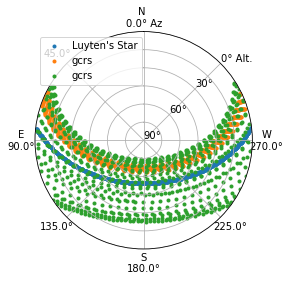

In [50]:
plot_sky(luyten, ATA, t_range, style_kwargs=targets_style)
plot_sky(sun, ATA, t_range, style_kwargs=sun_style)
plot_sky(moon, ATA, t_range, style_kwargs=moon_style)
plt.legend()

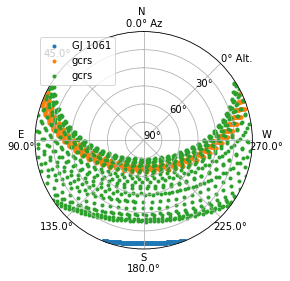

In [65]:
plot_sky(gj1061, ATA, t_range, style_kwargs=targets_style)
plot_sky(sun, ATA, t_range, style_kwargs=sun_style)
plot_sky(moon, ATA, t_range, style_kwargs=moon_style)
plt.legend()

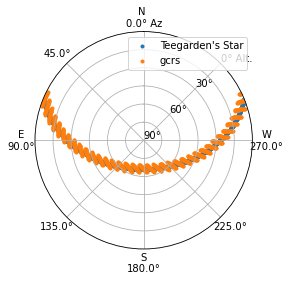

In [63]:
plot_sky(teegarden, ATA, t_range, style_kwargs=targets_style)
plot_sky(sun, ATA, t_range, style_kwargs=sun_style)
# plot_sky(moon, ATA, t_range, style_kwargs=moon_style)
plt.legend()

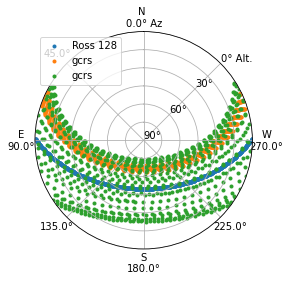

In [56]:
plot_sky(ross128, ATA, t_range, style_kwargs=targets_style)
plot_sky(sun, ATA, t_range, style_kwargs=sun_style)
plot_sky(moon, ATA, t_range, style_kwargs=moon_style)
plt.legend()

In [35]:
AtNightConstraint.compute_constraint(self, times=time_range, observer=ATA, targets=targets)

NameError: name 'self' is not defined